## DE Final - Average Crime Score Map

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/kevinko/Desktop/Uchicago/Data engineering platform/Final Project/cleaned_crime.csv')

In [5]:
df['neighbourhood'] = df['neighbourhood'].str.upper()

df.head()


,ID,Date,Primary Type,year,quarter,neighbourhood,Score,Score_avg
69,12879829,2022-10-30 01:20:00,THEFT,2022,4,ALBANY PARK,5,5.96
88,12877432,2022-10-30 02:00:00,THEFT,2022,4,ALBANY PARK,5,5.96
91,12876665,2022-10-30 02:00:00,MOTOR VEHICLE THEFT,2022,4,ALBANY PARK,5,5.96
136,12881337,2022-10-30 03:00:00,THEFT,2022,4,ALBANY PARK,5,5.96
147,12876791,2022-10-30 03:30:00,MOTOR VEHICLE THEFT,2022,4,ALBANY PARK,5,5.96


# Build a map visualizing the map of the average score of each neighbourghood

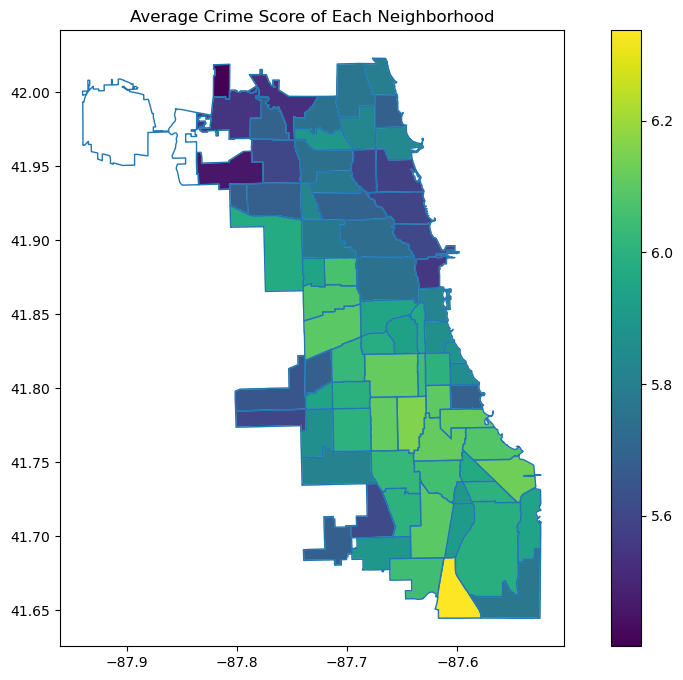

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a GeoDataFrame named gdf with geometry and necessary columns
# Replace 'your_geodata.geojson' with your actual geospatial data file or provide the GeoDataFrame in another way

# Example Data Loading (replace this with your actual data loading)
gdf = gpd.read_file('/Users/kevinko/Desktop/Uchicago/Data engineering platform/Final Project/Boundaries - Community Areas (current).geojson')

# Example Data Preparation
# Assuming your data is sorted by year, quarter, and neighborhood
# If not, you may need to sort it accordingly
df = df.sort_values(by=['year', 'quarter', 'neighbourhood'])

# Calculate the average score for each neighborhood
average_scores = df.groupby('neighbourhood')['Score'].mean().reset_index()

# Merge the average scores with the GeoDataFrame
gdf = gdf.merge(average_scores, how='left', left_on='community', right_on='neighbourhood')

# Plotting the Map
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the base map
gdf.boundary.plot(ax=ax, linewidth=1)

# Plot the average scores on the map
gdf.plot(column='Score', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('Average Crime Score of Each Neighborhood')
plt.show()


In [10]:
df[df['neighbourhood']=='RIVERDALE']

,ID,Date,Primary Type,year,quarter,neighbourhood,Score,Score_avg
205,12876700,2022-10-30 06:43:00,MOTOR VEHICLE THEFT,2022,4,RIVERDALE,5,6.04
703,12877299,2022-10-30 23:05:00,CRIMINAL DAMAGE,2022,4,RIVERDALE,8,6.04
1923,12878882,2022-11-01 13:37:00,BATTERY,2022,4,RIVERDALE,7,6.04
2014,12879451,2022-11-01 16:00:00,ASSAULT,2022,4,RIVERDALE,8,6.04
2103,12879306,2022-11-01 18:17:00,WEAPONS VIOLATION,2022,4,RIVERDALE,7,6.04
...,...,...,...,...,...,...,...,...
252605,13257589,2023-10-27 08:40:00,BATTERY,2023,4,RIVERDALE,7,6.48
252691,13257721,2023-10-27 11:02:00,CRIMINAL TRESPASS,2023,4,RIVERDALE,6,6.48
252872,13260879,2023-10-27 17:00:00,CRIMINAL DAMAGE,2023,4,RIVERDALE,8,6.48
252961,13259883,2023-10-27 20:00:00,MOTOR VEHICLE THEFT,2023,4,RIVERDALE,5,6.48
